## Notebook 7
### Giorgio Stucchi - 969107

In [1]:
# importazione librerie
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings
import string
from scipy.optimize import curve_fit
warnings.filterwarnings('ignore')
params = {'legend.fontsize': 'x-large', 'figure.figsize': (10, 6), 'axes.labelsize': 'x-large', 'axes.titlesize':'xx-large', 'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

We use the Monte Carlo NVT code to print the instantaneous values of the potential energy per particle $U/N$ under the following thermodynamic conditions:

* Solid state: $\rho^* = 1.1$, $T^*=0.8$ with a cutoff radius $r_{\text{cut}} = 2.2$
* Liquid state: $\rho^* = 0.8$, $T^*=1.1$ with a cutoff radius $r_{\text{cut}} = 2.5$
* Gas state: $\rho^* = 0.05$, $T^*=1.2$ with a cutoff radius $r_{\text{cut}} = 5.0$

Unlike Exercise 4, where the system was evolved using molecular dynamics methods, in this case, the Metropolis algorithm is used.

The issue with a simulation using the Metropolis algorithm is the correlation between consecutive states of the system.

To work with uncorrelated data, the simulation is divided into blocks, and the values of instantaneous physical quantities are averaged over each block. By choosing an appropriate block size, the data becomes uncorrelated.

Below, at the start of each section, there are the instantaneous values of potential energy per particle and for the considered phase. A simulation of $5\times10^5$ steps was performed to have a sufficient number of data points for calculating the autocorrelation function.

The number of steps used for equilibration varies depending on the phase of the system. In the case of the solid and liquid states, equilibration lasts 2000 steps, while in the case of the gas state, it lasts $100000$ steps.

In each section, we then calculate the autocorrelation function to determine (approximately) the correct size of the blocks. The autocorrelation function is  $$ \chi(t) = \frac{\langle U(t')U(t'+t)\rangle_{t'} - \langle U \rangle}{\sigma_U^2} $$. For a series of data $U(t)$ of length $T$ it is given by $$ \chi(t) = \frac{\frac{1}{T-t}\sum_{t'=0}^{T-t}U(t')U(t'+t) - \frac{1}{(T-t)^2} \sum_{t'=0}^{T-t}U(t') \sum_{t'=0}^{T-t}U(t'+t) }{\frac{1}{T}\sum_{t'=0}^{T}U^2(t') - \left(\frac{1}{T}\sum_{t'=0}^{T}U(t')\right)^2} $$

Notice that only 100000 points were used, instead of all the 500000, in order to speed up the calculation. The 100000 were already sufficient to predict the correct behaviour. 

Thereafter, we compute the statistical uncertainty on the mean of $U/N$, as a function of the length $L=M/N$ of the blocks. The plots show clearly that the uncertainty stabilizes on a more or less constant value for $L$ larger than a threshold $L$. This is however less evident in the gas phase. The number of blocks relative to each computed uncertainty was also printed.

**Solid Phase Results**

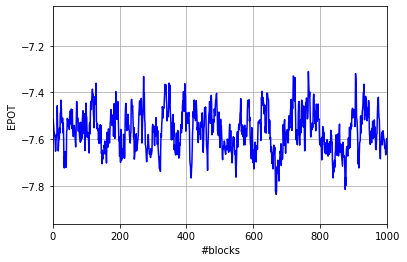

In [25]:
f= np.loadtxt("output_epot_solid.idat",usecols=1, unpack='true')
x = np.arange(len(f))
plt.plot(x,f,color= 'blue')
plt.xlabel('#blocks')
plt.ylabel('EPOT')
plt.xlim(0,1000)
plt.grid(True)
plt.show()

In [2]:
chi = np.zeros(3000)
#length = len(f)
length = 100000
for i in range (0, 3000, 1):
    a = 0;
    b = 0;
    c = 0;
    d = 0;
    e = 0;
    for j in range (0,(length - i), 1):
        a += f[j]*f[j+i]
        b += f[j]
        c += f[j+i]
    for k in range (0, length, 1):
        d += f[k]*f[k]
        e += f[k]
    chi[i] = (1. / (length - i) *(a - b * c / (length - i)))/(1./length * d - (1. / length * e)**2)

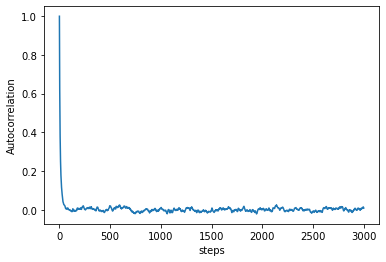

In [3]:
plt.plot(chi)
plt.xlabel('steps')
plt.ylabel('Autocorrelation')
plt.show()

50000
4545
2380
1612
1219
980
819
704
617
549
495
450
413
381
354
331
310
292
276
261
248
236
226
216
207
199
191
184
177
171
166
160
155
151
146
142
138
134
131
127
124
121
118
116
113
110
108
106
103
101


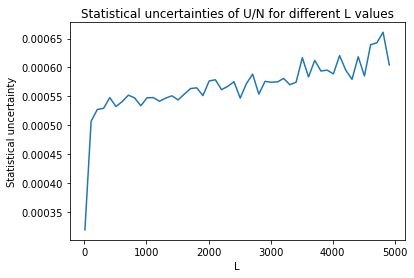

In [22]:
def error(AV, AV2, n):
    if n == 0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2) / n)

M = 500000             # Total number of throws
L_values = np.arange(10, 5001, 100)   # Different values of L to use
errors = np.zeros(len(L_values))

for i, L in enumerate(L_values):    
    n_blocks = M // L
    print(n_blocks)
    ave = np.zeros(n_blocks)
    av2 = np.zeros(n_blocks)
    sum_prog = np.zeros(n_blocks)
    su2_prog = np.zeros(n_blocks)
    err_prog = np.zeros(n_blocks)

    for j in range(n_blocks):
        sum1 = 0
        for k in range(L):
            sum1 += f[k + j*L]
        ave[j] = sum1 / L     # r_j 
        av2[j] = ave[j]**2    # (r_j)^2

    for j in range(n_blocks):
        for k in range(j + 1):
            sum_prog[j] += ave[k]  # SUM_{k=0,j} r_k
            su2_prog[j] += av2[k]  # SUM_{k=0,j} (r_k)^2
        sum_prog[j] /= (j+1)  # Cumulative average
        su2_prog[j] /= (j+1)  # Cumulative square average
        err_prog[j] = error(sum_prog, su2_prog, j)  # Statistical uncertainty

    errors[i] = err_prog[n_blocks-1]  # Take the uncertainty of the last block as the overall uncertainty for this L value

plt.plot(L_values, errors)
plt.xlabel("L")
plt.ylabel("Statistical uncertainty")
plt.title("Statistical uncertainties of U/N for different L values")
plt.show()


**Liquid Phase Results**

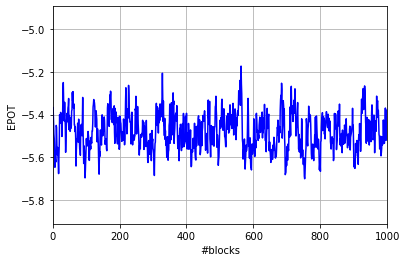

In [28]:
g= np.loadtxt("output_epot_liquid.idat",usecols=1, unpack='true')
x = np.arange(len(g))
plt.plot(x,g,color= 'blue')
plt.xlabel('#blocks')
plt.xlim(0,1000)
plt.ylabel('EPOT')
plt.grid(True)
plt.show()

In [29]:
chi = np.zeros(3000)
#length = len(g)
length = 100000
for i in range (0, 3000, 1):
    a = 0;
    b = 0;
    c = 0;
    d = 0;
    e = 0;
    for j in range (0,(length - i), 1):
        a += g[j]*g[j+i]
        b += g[j]
        c += g[j+i]
    for k in range (0, length, 1):
        d += g[k]*g[k]
        e += g[k]
    chi[i] = (1. / (length - i) *(a - b * c / (length - i)))/(1./length * d - (1. / length * e)**2)

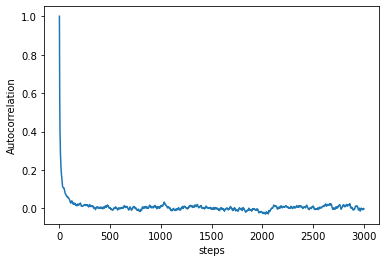

In [30]:
plt.plot(chi)
plt.xlabel('steps')
plt.ylabel('Autocorrelation')
plt.show()

50000
4545
2380
1612
1219
980
819
704
617
549
495
450
413
381
354
331
310
292
276
261
248
236
226
216
207
199
191
184
177
171
166
160
155
151
146
142
138
134
131
127
124
121
118
116
113
110
108
106
103
101


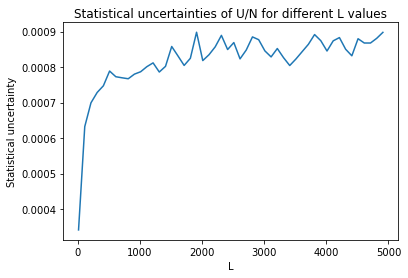

In [31]:
def error(AV, AV2, n):
    if n == 0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2) / n)

M = 500000             # Total number of throws
L_values = np.arange(10, 5001, 100)   # Different values of L to use
errors = np.zeros(len(L_values))

for i, L in enumerate(L_values):    
    n_blocks = M // L
    print(n_blocks)
    ave = np.zeros(n_blocks)
    av2 = np.zeros(n_blocks)
    sum_prog = np.zeros(n_blocks)
    su2_prog = np.zeros(n_blocks)
    err_prog = np.zeros(n_blocks)

    for j in range(n_blocks):
        sum1 = 0
        for k in range(L):
            sum1 += g[k + j*L]
        ave[j] = sum1 / L     # r_j 
        av2[j] = ave[j]**2    # (r_j)^2

    for j in range(n_blocks):
        for k in range(j + 1):
            sum_prog[j] += ave[k]  # SUM_{k=0,j} r_k
            su2_prog[j] += av2[k]  # SUM_{k=0,j} (r_k)^2
        sum_prog[j] /= (j+1)  # Cumulative average
        su2_prog[j] /= (j+1)  # Cumulative square average
        err_prog[j] = error(sum_prog, su2_prog, j)  # Statistical uncertainty

    errors[i] = err_prog[n_blocks-1]  # Take the uncertainty of the last block as the overall uncertainty for this L value

plt.plot(L_values, errors)
plt.xlabel("L")
plt.ylabel("Statistical uncertainty")
plt.title("Statistical uncertainties of U/N for different L values")
plt.show()


**Gas Phase Results**

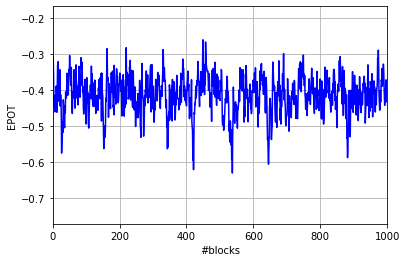

In [33]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

h= np.loadtxt("output_epot_gas.idat",usecols=1, unpack='true')
x = np.arange(len(h))
plt.plot(x,h,color= 'blue')
plt.xlabel('#blocks')
plt.xlim(0,1000)
plt.ylabel('EPOT')
plt.grid(True)
plt.show()

In [34]:
chi = np.zeros(3000)
#length = len(h)
length = 100000
for i in range (0, 3000, 1):
    a = 0;
    b = 0;
    c = 0;
    d = 0;
    e = 0;
    for j in range (0,(length - i), 1):
        a += h[j]*h[j+i]
        b += h[j]
        c += h[j+i]
    for k in range (0, length, 1):
        d += h[k]*h[k]
        e += h[k]
    chi[i] = (1. / (length - i) *(a - b * c / (length - i)))/(1./length * d - (1. / length * e)**2)

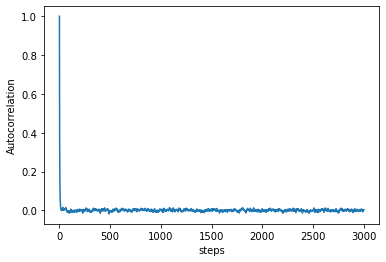

In [35]:
plt.plot(chi)
plt.xlabel('steps')
plt.ylabel('Autocorrelation')
plt.show()

50000
4545
2380
1612
1219
980
819
704
617
549
495
450
413
381
354
331
310
292
276
261
248
236
226
216
207
199
191
184
177
171
166
160
155
151
146
142
138
134
131
127
124
121
118
116
113
110
108
106
103
101


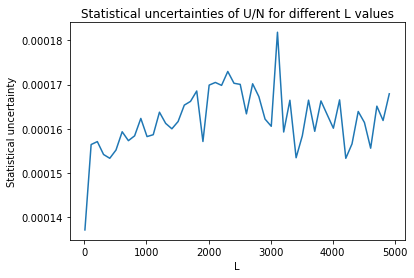

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import math

def error(AV, AV2, n):
    if n == 0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2) / n)

M = 500000             # Total number of throws
L_values = np.arange(10, 5001, 100)   # Different values of L to use
errors = np.zeros(len(L_values))

for i, L in enumerate(L_values):    
    n_blocks = M // L
    print(n_blocks)
    ave = np.zeros(n_blocks)
    av2 = np.zeros(n_blocks)
    sum_prog = np.zeros(n_blocks)
    su2_prog = np.zeros(n_blocks)
    err_prog = np.zeros(n_blocks)

    for j in range(n_blocks):
        sum1 = 0
        for k in range(L):
            sum1 += h[k + j*L]
        ave[j] = sum1 / L     # r_j 
        av2[j] = ave[j]**2    # (r_j)^2

    for j in range(n_blocks):
        for k in range(j + 1):
            sum_prog[j] += ave[k]  # SUM_{k=0,j} r_k
            su2_prog[j] += av2[k]  # SUM_{k=0,j} (r_k)^2
        sum_prog[j] /= (j+1)  # Cumulative average
        su2_prog[j] /= (j+1)  # Cumulative square average
        err_prog[j] = error(sum_prog, su2_prog, j)  # Statistical uncertainty

    errors[i] = err_prog[n_blocks-1]  # Take the uncertainty of the last block as the overall uncertainty for this L value

plt.plot(L_values, errors)
plt.xlabel("L")
plt.ylabel("Statistical uncertainty")
plt.title("Statistical uncertainties of U/N for different L values")
plt.show()


Now we want to compare the predictions of the MC simulations with those of Molecular Dynamics NVE. We compare U/N, Pressure and the radial distribution function. 
The radial distribution function, or pair correlation function, $g(r)$ describes the probability of finding a particle at a distance $r$ from a reference particle, compared to what would be expected for an ideal gas of the same density.

The radial distribution function, taking into account the potential tails beyond the cutoff radius, allows us to estimate the corrections to be applied to the calculated values of pressure and potential energy.

If $r_c$ is the cutoff radius, the correction to the potential energy per particle is given by:
$$\frac{\langle V \rangle_{\text{tail}}}{N} = 2\pi\rho N\int_0^{\infty} r^2V(r)g(r)dr$$

Since the tails refer to large distances, the radial distribution function tends to approach that of an ideal gas when $g(r)\approx 1$. Therefore, the correction becomes:
$$\frac{\langle V \rangle_{\text{tail}}}{N} \approx \pi\rho N\int_{r_c}^{\infty} r^2V(r)dr = \frac{8\pi\epsilon\rho}{3r_c^3}\left(\frac{1}{3r_c^6} - 1\right)$$

For the pressure correction, it is obtained by applying the virial theorem:
$$\frac{\langle w \rangle_{\text{tail}}}{3N\epsilon} \approx \frac{2}{3} \pi\rho \int_{r_c}^{\infty} r^2 48 \left[\left(\frac{\sigma}{r}\right)^{12} -\frac{1}{2}\left(\frac{\sigma}{r}\right)^{6} \right]dr = 32\pi\rho\left[\frac{1}{9r_c^9}-\frac{1}{6r_c^3}\right]$$

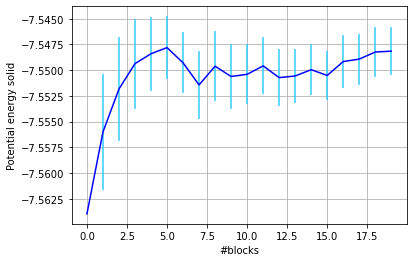

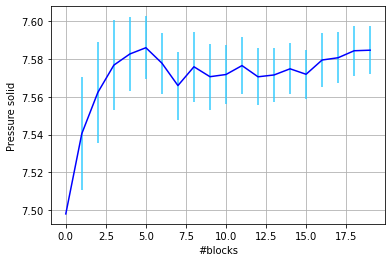

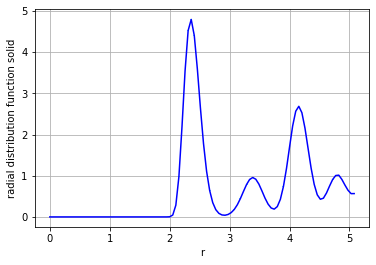

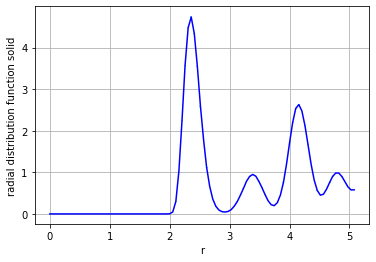

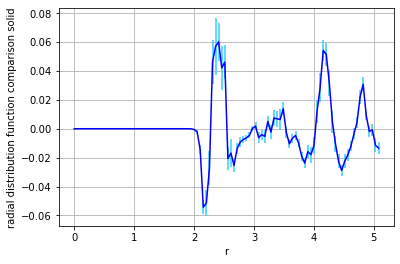

In [6]:
u, error = np.loadtxt("output_epot_solid_MC.dat",usecols=(2,3), unpack='true')
x = np.arange(len(u))
plt.errorbar(x,u,color= 'blue', yerr = error, ecolor='#33ccff')
plt.xlabel('#blocks')
plt.ylabel('Potential energy solid')
plt.grid(True)
plt.show()

pres, error = np.loadtxt("output_pres_solid_MC.dat",usecols=(2,3), unpack='true')
x = np.arange(len(pres))
plt.errorbar(x,pres,color= 'blue', yerr = error, ecolor='#33ccff')
plt.xlabel('#blocks')
plt.ylabel('Pressure solid')
plt.grid(True)
plt.show()

rad, error = np.loadtxt("output_radfinal_solid_MC.dat",usecols=(0,1), unpack='true')
x = np.arange(len(rad)) * 0.0512993 
plt.errorbar(x,rad,color= 'blue', yerr = error, ecolor='#33ccff')
plt.xlabel('r')
plt.ylabel('radial distribution function solid')
plt.grid(True)
plt.show()

rad2, error = np.loadtxt("output_radfinal_solid_NVE.dat",usecols=(0,1), unpack='true')
x = np.arange(len(rad2)) * 0.0512993 
plt.errorbar(x,rad2,color= 'blue', yerr = error, ecolor='#33ccff')
plt.xlabel('r')
plt.ylabel('radial distribution function solid')
plt.grid(True)
plt.show()

x = np.arange(len(rad)) * 0.0512993 
plt.errorbar(x,rad - rad2,color= 'blue', yerr = error, ecolor='#33ccff')
plt.xlabel('r')
plt.ylabel('radial distribution function comparison solid')
plt.grid(True)
plt.show()

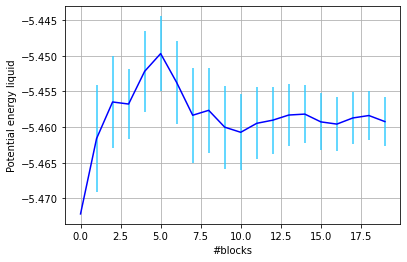

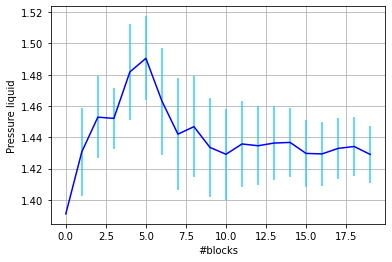

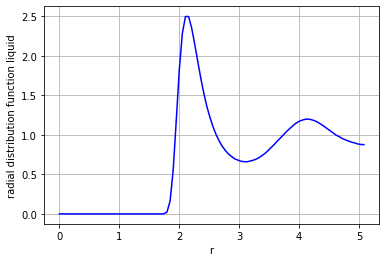

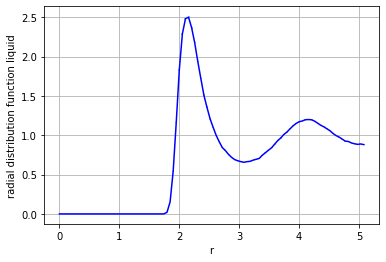

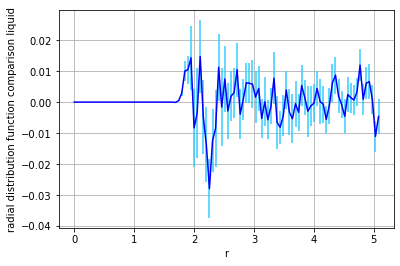

In [7]:
u, error = np.loadtxt("output_epot_liquid_MC.dat",usecols=(2,3), unpack='true')
x = np.arange(len(u))
plt.errorbar(x,u,color= 'blue', yerr = error, ecolor='#33ccff')
plt.xlabel('#blocks')
plt.ylabel('Potential energy liquid')
plt.grid(True)
plt.show()

pres, error = np.loadtxt("output_pres_liquid_MC.dat",usecols=(2,3), unpack='true')
x = np.arange(len(pres))
plt.errorbar(x,pres,color= 'blue', yerr = error, ecolor='#33ccff')
plt.xlabel('#blocks')
plt.ylabel('Pressure liquid')
plt.grid(True)
plt.show()

rad, error = np.loadtxt("output_radfinal_liquid_MC.dat",usecols=(0,1), unpack='true')
x = np.arange(len(rad)) * 0.0512993 
plt.errorbar(x,rad,color= 'blue', yerr = error, ecolor='#33ccff')
plt.xlabel('r')
plt.ylabel('radial distribution function liquid')
plt.grid(True)
plt.show()

rad2, error = np.loadtxt("output_radfinal_liquid_NVE.dat",usecols=(0,1), unpack='true')
x = np.arange(len(rad2)) * 0.0512993 
plt.errorbar(x,rad2,color= 'blue', yerr = error, ecolor='#33ccff')
plt.xlabel('r')
plt.ylabel('radial distribution function liquid')
plt.grid(True)
plt.show()

x = np.arange(len(rad)) * 0.0512993 
plt.errorbar(x,rad - rad2,color= 'blue', yerr = error, ecolor='#33ccff')
plt.xlabel('r')
plt.ylabel('radial distribution function comparison liquid')
plt.grid(True)
plt.show()

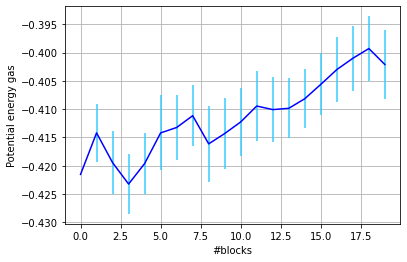

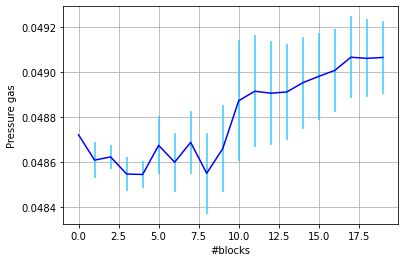

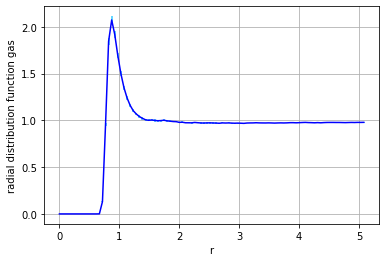

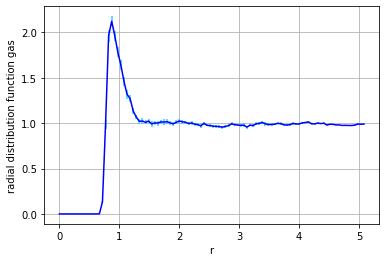

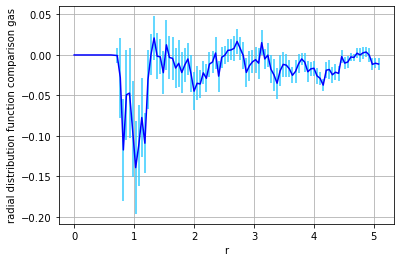

In [8]:
u, error = np.loadtxt("output_epot_gas_MC.dat",usecols=(2,3), unpack='true')
x = np.arange(len(u))
plt.errorbar(x,u,color= 'blue', yerr = error, ecolor='#33ccff')
plt.xlabel('#blocks')
plt.ylabel('Potential energy gas')
plt.grid(True)
plt.show()

pres, error = np.loadtxt("output_pres_gas_MC.dat",usecols=(2,3), unpack='true')
x = np.arange(len(pres))
plt.errorbar(x,pres,color= 'blue', yerr = error, ecolor='#33ccff')
plt.xlabel('#blocks')
plt.ylabel('Pressure gas')
plt.grid(True)
plt.show()

rad, error = np.loadtxt("output_radfinal_gas_MC.dat",usecols=(0,1), unpack='true')
x = np.arange(len(rad)) * 0.0512993 
plt.errorbar(x,rad,color= 'blue', yerr = error, ecolor='#33ccff')
plt.xlabel('r')
plt.ylabel('radial distribution function gas')
plt.grid(True)
plt.show()

rad2, error = np.loadtxt("output_radfinal_gas_NVE.dat",usecols=(0,1), unpack='true')
x = np.arange(len(rad2)) * 0.0512993 
plt.errorbar(x,rad2,color= 'blue', yerr = error, ecolor='#33ccff')
plt.xlabel('r')
plt.ylabel('radial distribution function gas')
plt.grid(True)
plt.show()

x = np.arange(len(rad)) * 0.0512993 
plt.errorbar(x,rad - rad2,color= 'blue', yerr = error, ecolor='#33ccff')
plt.xlabel('r')
plt.ylabel('radial distribution function comparison gas')
plt.grid(True)
plt.show()

In general, the results do not completely agree. This is due to the fact that we are not really in the thermodynamical limit, so we are in reality comparing two different entities.